In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Задание 1: Работа с массивами NumPy
## Цель: Проверить знание методов NumPy для анализа данных.

## Задание:
1. Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].

In [3]:
random_array = np.random.randint(10, 101, size=50)
random_array

array([ 73,  66,  86,  95,  68,  26,  19,  49,  37,  90,  34,  63,  63,
        58,  18,  33,  25,  30,  54,  99,  62,  50,  39,  66,  11,  19,
        22,  22,  15,  52,  81,  14,  30,  51,  24,  85,  43,  41,  64,
        94,  68,  59,  66,  74,  48, 100,  29,  96,  70,  26])

2. Найдите:
3. Среднее арифметическое массива.

In [4]:
random_array.mean()

52.14

4. Медиану

In [5]:
np.median(random_array)

51.5

5. Стандартное отклонение.

In [6]:
np.std(random_array)

25.618750945352506

6. Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

In [10]:
divided_by_3 = random_array / 3
divided_by_3

array([24.33333333, 22.        , 28.66666667, 31.66666667, 22.66666667,
        8.66666667,  6.33333333, 16.33333333, 12.33333333, 30.        ,
       11.33333333, 21.        , 21.        , 19.33333333,  6.        ,
       11.        ,  8.33333333, 10.        , 18.        , 33.        ,
       20.66666667, 16.66666667, 13.        , 22.        ,  3.66666667,
        6.33333333,  7.33333333,  7.33333333,  5.        , 17.33333333,
       27.        ,  4.66666667, 10.        , 17.        ,  8.        ,
       28.33333333, 14.33333333, 13.66666667, 21.33333333, 31.33333333,
       22.66666667, 19.66666667, 22.        , 24.66666667, 16.        ,
       33.33333333,  9.66666667, 32.        , 23.33333333,  8.66666667])

In [13]:
# фильтр
random_array[random_array % 3 == 0]

array([66, 90, 63, 63, 18, 33, 30, 54, 99, 39, 66, 15, 81, 30, 51, 24, 66,
       48, 96])

# Задание 2: Анализ данных с помощью Pandas

Цель: Проверить навыки анализа и обработки данных.

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:

- date (дата продаж),
- region (регион),
- product (продукт),
- sales (объем продаж).

## Задание:

1. Загрузите данные из файла.

In [15]:
data = pd.read_csv("data/sales_data_large.csv")
data.sample(5)

,date,region,product,sales
144,2024-12-09,East,Widget B,162
158,2024-12-10,South,Widget C,340
165,2024-12-10,North,Widget B,180
449,2024-12-29,West,Widget A,413
119,2024-12-07,South,Widget C,224


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     500 non-null    object
 1   region   500 non-null    object
 2   product  500 non-null    object
 3   sales    500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


2. Определите:
3. Общее количество записей.

In [19]:
print("Число строк:", data.shape[0], "\nЧисло столбцов:", data.shape[1])

Число строк: 500 
Число столбцов: 4


4. Какие регионы и продукты присутствуют в данных.

In [22]:
# список регионов
data["region"].unique().tolist()

['West', 'South', 'East', 'North']

In [23]:
# список продуктов
data["product"].unique().tolist()

['Widget C', 'Widget B', 'Widget A']

5. Подсчитайте:
6. Общие продажи по регионам.

In [25]:
data.groupby("region")["sales"].sum().to_frame()

,sales
region,
East,29244
North,39605
South,33023
West,35171


7. Средний объем продаж для каждого продукта.

In [26]:
data.groupby("product")["sales"].mean().to_frame()

,sales
product,
Widget A,275.424242
Widget B,268.331361
Widget C,278.614458


8. Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.

In [27]:
data.pivot_table(
    values="sales", index="region", columns="product", aggfunc="mean", fill_value=0
)

product,Widget A,Widget B,Widget C
region,,,
East,291.464286,263.116279,271.361111
North,289.145833,238.477273,304.660000
South,277.380952,282.833333,263.722222
West,250.106383,291.550000,267.136364


# Задание 3: Очистка данных и визуализация

Цель: Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.

Данные: Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. Поля:

- date (дата продаж),
- sales (объем продаж),
- region (регион).

## Задание:

1. Найдите и устраните ошибки в данных:
2. Заполните пропущенные даты.

In [86]:
data1 = pd.read_csv("data/sales_cleaning_large.csv")
data.head()

,date,region,product,sales
0,2024-12-01,West,Widget C,246
1,2024-12-01,South,Widget B,152
2,2024-12-01,West,Widget B,391
3,2024-12-01,West,Widget A,272
4,2024-12-01,East,Widget A,337


In [79]:
# посмотрим на пропуски и типы данных
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    190 non-null    object 
 1   sales   190 non-null    float64
 2   region  200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [87]:
# преобразуем столбец 'date' в формат datetime
data1["date"] = pd.to_datetime(data1["date"], errors="coerce")


# Найдем минимальную и максимальную дату
min_date = data1["date"].min()
max_date = data1["date"].max()

# Заполним пропущенные значения случайными датами в указанном диапазоне
data1["date"] = data1["date"].apply(
    lambda x: (
        x
        if pd.notnull(x)
        else pd.to_datetime(np.random.choice(pd.date_range(min_date, max_date)))
    )
)

In [88]:
# проверим, что пропусков больше нет
data1["date"].isnull().sum()

0

3. Удалите отрицательные значения в столбце sales или замените их на медиану столбца.

In [90]:
# количество отрицательных значений до замены
data1[data1["sales"] < 0]['sales'].count()

89

In [91]:
# считаем медиану
median_sales = data1.loc[data1["sales"] > 0, "sales"].median()

# заменяем отрицательные значения на медиану
data1["sales"] = np.where(data1["sales"] < 0, median_sales, data1["sales"])

In [92]:
# количество отрицательных значений после замены
data1[data1["sales"] < 0]['sales'].count()

0

4. Заполните пропущенные значения в sales средним значением.

In [93]:
data1["sales"] = data1["sales"].fillna(data1["sales"].mean())

In [94]:
# проверим, что пропусков не осталось
data1.isnull().sum()

date      0
sales     0
region    0
dtype: int64

5. Постройте график продаж по датам. Убедитесь, что даты упорядочены.

In [97]:
data1["date"] = pd.to_datetime(data1["date"])
data1 = data1.sort_values(by="date")

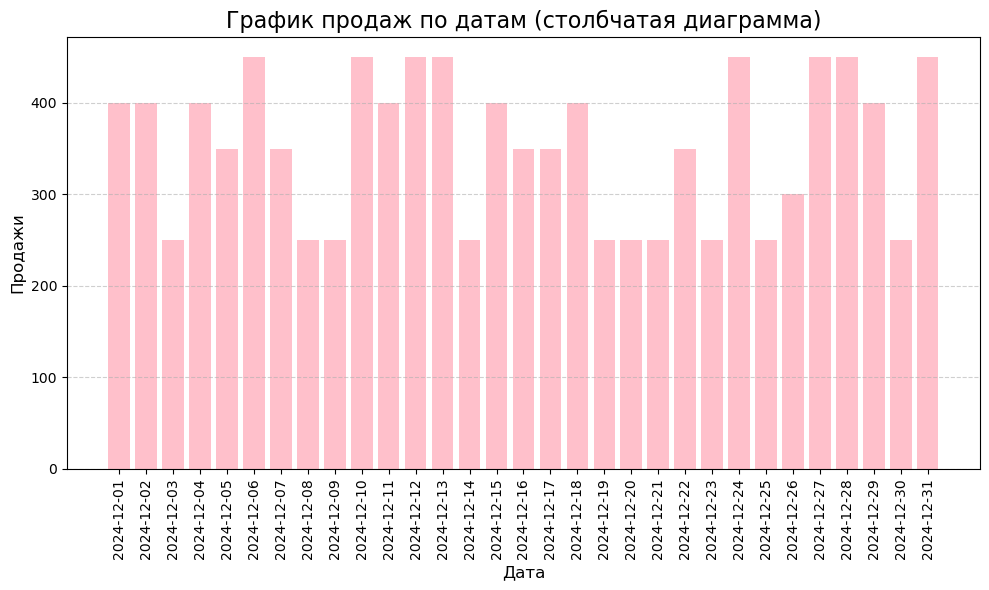

In [105]:
plt.figure(figsize=(10, 6))
plt.bar(data1["date"].dt.strftime("%Y-%m-%d"), data1["sales"], color="pink")
plt.title("График продаж по датам (столбчатая диаграмма)", fontsize=16)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Продажи", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Задание 4: Получение данных из API
Цель: Проверить способность работать с веб-данными.

Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).

## Задание:
Загрузите данные и создайте DataFrame с полями: id, name, email, company_name

In [127]:
import requests

url = "https://jsonplaceholder.typicode.com/users"
response = requests.get(url)

# Преобразование данных в DataFrame
data2 = response.json()
df = pd.DataFrame(data2)

df.head()

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [128]:
df = df[["id", "name", "email", "company"]]

# извлекаем название компании
df["company_name"] = df["company"].apply(lambda x: x["name"])

del df["company"]

# фильтрация пользователей, работающих в компаниях, название которых содержит слово "Group"
filtered_df = df[df["company_name"].str.contains("Group", case=False)]

Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

In [129]:
filtered_df

,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
